# Pandas数据结构--DataFrame

pandas中有两种数据结构----DataFrame 和 Series

数据分析中DataFrame用得比较多，先学习下DataFrame的用法。

DataFrame是一个表格型数据结构，含有一组有序的列，每列可以使不同的值类型（数值、字符串、布尔值等）。

## 创建

最常用的是直接传入一个由等长列表或numpy数组组成的字典：

In [3]:
from pandas import DataFrame ,Series  #用的很多，故直接导入其命名空间
import pandas as pd  

data = {'state':['Lily','Lily','Lily','York','York'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5,1.7,3.6,2.4,2.9]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Lily,2000
1,1.7,Lily,2001
2,3.6,Lily,2002
3,2.4,York,2001
4,2.9,York,2002


结果会自动加上索引，且会自动排序，需注意：**列的排序与列名输入顺序无关**。

DataFrame的参数可指定列的顺序--**columns=[ ]** ，以及索引名称--**index=[ ]**。
如果指定的列名在数据中没有数值，会自动用NaN(空值)填充。

In [4]:
frame2 =DataFrame(data,columns=['year','state','pop','debt'],
                 index=['one','two','three','four','five'])
frame2

,year,state,pop,debt
one,2000,Lily,1.5,NaN
two,2001,Lily,1.7,NaN
three,2002,Lily,3.6,NaN
four,2001,York,2.4,NaN
five,2002,York,2.9,NaN


下表列出了可以输入给DataFrame构造器的数据：

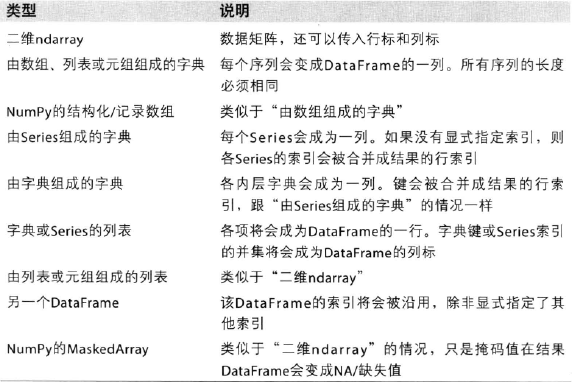

## 索引

### 列索引

选取year列可采用frame2['year']或者frame2.year的形式，返回的是带有index的**Series格式**：

In [5]:
frame2['year']

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [6]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

可同时选取多列，返回的就是一个新的DataFrame。Series与DataFrame的一点区别就是，**Series是只有一列且带有索引的DataFrame**。

In [7]:
frame2[['year','state']]

,year,state
one,2000,Lily
two,2001,Lily
three,2002,Lily
four,2001,York
five,2002,York


### 行索引

选取four行可采用frame2.loc['four'] ,索引字段loc,需注意**loc只能用来对行进行索引**,且索引参数是'index'：

In [8]:
frame2.loc['four']

year     2001
state    York
pop       2.4
debt      NaN
Name: four, dtype: object

可以用**iloc[ ]**按位置进行索引，类似二维数组的索引方式。需注意其按位置索引**只接收整数的行列索引号，不接收字符型的index、column名**：

In [9]:
frame2.iloc[0,1]

'Lily'

In [10]:
frame2.iloc[0][1]

'Lily'

In [11]:
frame2.iloc[0,:] #表示第一行，逗号前为行号，逗号后为列号

year     2000
state    Lily
pop       1.5
debt      NaN
Name: one, dtype: object

In [12]:
frame2.iloc[:] #这种写法可显示所有数据

,year,state,pop,debt
one,2000,Lily,1.5,NaN
two,2001,Lily,1.7,NaN
three,2002,Lily,3.6,NaN
four,2001,York,2.4,NaN
five,2002,York,2.9,NaN


## 赋值

可以将一个标量赋值给一列，整列都变成这个标量：

In [13]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Lily,1.5,16.5
two,2001,Lily,1.7,16.5
three,2002,Lily,3.6,16.5
four,2001,York,2.4,16.5
five,2002,York,2.9,16.5


也可以将等长的列表赋值给列：

In [14]:
import numpy as np

frame2['debt'] = np.arange(5)
#frame2['debt'] = range(5)
frame2

,year,state,pop,debt
one,2000,Lily,1.5,0
two,2001,Lily,1.7,1
three,2002,Lily,3.6,2
four,2001,York,2.4,3
five,2002,York,2.9,4


In [15]:
range(5) #range函数？

range(0, 5)

In [16]:
np.arange(5) #返回的是array数组

array([0, 1, 2, 3, 4])

## 删除

### 删除列

为不存在的列赋值会创建出一个新列。**关键字del可以删除列**：

In [17]:
frame2['eastern'] = frame2.state =='Lily'
frame2

,year,state,pop,debt,eastern
one,2000,Lily,1.5,0,True
two,2001,Lily,1.7,1,True
three,2002,Lily,3.6,2,True
four,2001,York,2.4,3,False
five,2002,York,2.9,4,False


In [18]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Lily,1.5,0
two,2001,Lily,1.7,1
three,2002,Lily,3.6,2
four,2001,York,2.4,3
five,2002,York,2.9,4


drop方法也能删除列:

In [19]:
frame3 = frame2.copy()
frame3.drop('year',axis=1) #axis=1按列，axis=0按行

,state,pop,debt
one,Lily,1.5,0
two,Lily,1.7,1
three,Lily,3.6,2
four,York,2.4,3
five,York,2.9,4


### 删除行

drop方法,选择行索引，并按行删除 **axis=0** ：

In [20]:
frame3.drop('one',axis=0)

,year,state,pop,debt
two,2001,Lily,1.7,1
three,2002,Lily,3.6,2
four,2001,York,2.4,3
five,2002,York,2.9,4


## 数据清洗

### 滤除缺失数据 dropna

pandas使用浮点值NaN(Not a Number)表示浮点和非浮点数组间的缺失数值。

在数据中需用np.nan表示缺失值，结果的视图中显示为NaN。

In [21]:
from numpy import nan as NA
data = Series([1,NA,2])
data

0    1.0
1    NaN
2    2.0
dtype: float64

DataFrame中dropna()会**丢掉所有含有NaN的行**:

In [22]:
data = DataFrame([[1.,6.5,3.],[1.,NA,NA],[NA,NA,NA],[NA,6.5,3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [23]:
cleaned

,0,1,2
0,1.0,6.5,3.0


传入参数 **how='all'** 将只丢弃全为NaN的那些行：


In [24]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


### 填充缺失数据 fillna

fillna()参数为常数，则将所有的NaN替换为此常数：

In [25]:
df = DataFrame(np.random.randn(7,3))
df.iloc[:4,1] = NA
df.iloc[:2,2] =NA
df

,0,1,2
0,-1.776792,NaN,NaN
1,0.357816,NaN,NaN
2,0.462099,NaN,-0.349633
3,0.709051,NaN,1.105340
4,-1.043976,1.566624,-0.372712
5,-0.537389,0.046374,-1.352017
6,2.030101,0.017846,-0.419171


注意：loc的索引切片与列表的切片不同，**列表list留前不留后，iloc[ ]前后都留**。

fillna()参数为常数，则将所有的NaN替换为此常数:

In [26]:
df.fillna(0)

,0,1,2
0,-1.776792,0.000000,0.000000
1,0.357816,0.000000,0.000000
2,0.462099,0.000000,-0.349633
3,0.709051,0.000000,1.105340
4,-1.043976,1.566624,-0.372712
5,-0.537389,0.046374,-1.352017
6,2.030101,0.017846,-0.419171


若传入字典，键为列名，值为填充的数，可实现对不同的列传入不同的值：

In [27]:
df.fillna({1:0.5 , 2:-1})

,0,1,2
0,-1.776792,0.500000,-1.000000
1,0.357816,0.500000,-1.000000
2,0.462099,0.500000,-0.349633
3,0.709051,0.500000,1.105340
4,-1.043976,1.566624,-0.372712
5,-0.537389,0.046374,-1.352017
6,2.030101,0.017846,-0.419171


数据处理时，更常用的是填充原数列的平均值等：

In [28]:
data = Series([1.0,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [29]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

以下列出fillna的参数：

### 其他常用函数

#### replace

In [30]:
df = DataFrame({'a':[1,2,3,4,5],'b':[3,1,5,7,9],'c':[8,5,1,3,9]})
df

,a,b,c
0,1,3,8
1,2,1,5
2,3,5,1
3,4,7,3
4,5,9,9


replace函数可以将DataFrame中某个数据进行替换:

In [31]:
df.replace(1,'one')

,a,b,c
0,one,3,8
1,2,one,5
2,3,5,one
3,4,7,3
4,5,9,9


In [32]:
df.replace([2,3],['two','three'],inplace=True)
df

,a,b,c
0,1,three,8
1,two,1,5
2,three,5,1
3,4,7,three
4,5,9,9


不加参数inplace=True，将不修改调用者对象而只产生副本，对原对象无影响。加入之后，则直接在原调用对象上进行操作。

#### set_index

set_index函数可以将DataFrame的某**一列或多列**设为索引(多列设为索引会生成层次化索引)：

In [33]:
col =['a','b','c']
data = DataFrame([[1,2,7],[2,8,9],[3,5,10]],columns=col)
data

,a,b,c
0,1,2,7
1,2,8,9
2,3,5,10


In [34]:
indexed = data.set_index('a')
indexed

,b,c
a,,
1,2,7
2,8,9
3,5,10


如果不想显示索引名'a'，可以令其为None:

In [35]:
indexed.index.name=None
indexed

,b,c
1,2,7
2,8,9
3,5,10


In [36]:
indexed2 = indexed.reset_index() #如果之前不去除索引名‘a’，重设回的index是‘a’ 
indexed2

,index,b,c
0,1,2,7
1,2,8,9
2,3,5,10


#### rename

用rename函数对列名重命名,将index重新更名为a:

In [37]:
indexed2 = indexed2.rename(columns = {'index':'a'})
indexed2

,a,b,c
0,1,2,7
1,2,8,9
2,3,5,10


另一种对列名重命名的方法，直接对columns属性进行整体赋值：

In [38]:
indexed2.columns = ['e','f','g']
indexed2

,e,f,g
0,1,2,7
1,2,8,9
2,3,5,10


### 层次化索引

层次化索引（hierarchical indexing）是pandas的一项重要功能，它使你能在一个轴上拥有多个索引级别。抽象点说，它能以低维度形式处理高维度数据。

一个简单的例子：创建一个Series，并用一个由列表或数组组成的列表作为索引。

In [39]:
data = Series(np.random.randn(10),index=[['a','a','a','b','b','b','c','c','d','d'],
                                         [1,2,3,1,2,3,1,2,2,3]])
data

a  1   -0.717061
   2   -0.075349
   3   -1.843512
b  1   -1.116709
   2   -0.642510
   3    0.930700
c  1    0.051583
   2    0.654722
d  2   -0.518376
   3    0.251844
dtype: float64

索引之间的“间隔”表示直接用上面的标签：

In [40]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

选数据自己的操作很简单：

In [41]:
data['b']

1   -1.116709
2   -0.642510
3    0.930700
dtype: float64

In [42]:
data['b':'c']

b  1   -1.116709
   2   -0.642510
   3    0.930700
c  1    0.051583
   2    0.654722
dtype: float64

In [43]:
data.loc[['b','d']]

b  1   -1.116709
   2   -0.642510
   3    0.930700
d  2   -0.518376
   3    0.251844
dtype: float64

还可以直接对“内层”进行选取：

In [44]:
data[:,2]

a   -0.075349
b   -0.642510
c    0.654722
d   -0.518376
dtype: float64

结果为第二层的索引2的所有数据。

# 数据加载、存储与文件格式

如果不能将数据导入导出Python，以上介绍的工具也就没有什么意义了。输入输出通常可以划分为几大类：读取文本文件和其他更高效的磁盘存储格式，加载数据库中的数据。

## 整体读取文本文件

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。下面对它们进行总结，其中read_csv和read_table以后可能用得最多。

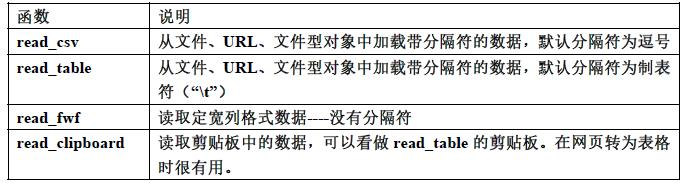

文件examples/ex1.csv是以逗号作为分隔符，可以用rad_csv将其读入为DataFrame：

In [45]:
list(open('examples/ex1.csv'))

['a,b,c,d,message\n', '1,2,3,4,hello\n', '5,6,7,8,world\n', '9,10,11,12,foo']

In [46]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


我们也可以用read_table，不过需要**指定分隔符**：

In [47]:
pd.read_table('examples/ex1.csv',sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


并不是所有文件都有标题行，读入的方法有两个。可以让**pandas为其分配默认的列名**：

In [48]:
pd.read_csv('examples/ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


还可以自己定义列名：

In [49]:
pd.read_csv('examples/ex2.csv',names=['a','b','c','d','message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


假如希望将message列做成DataFrame的索引，可以通过index_col参数指定'message'：

In [50]:
names = ['a','b','c','d','message']
pd.read_csv('examples/ex2.csv',names=names,index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


如果希望将多个列做成一个层次化索引，只需传入由列编号或列名组成的列表：

In [51]:
pd.read_csv('examples/csv_mindex.csv',index_col=['key1','key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

有些表格可能不是用固定的分隔符去分隔字段，对于这种情况，可以编写一个正则表达式作为read_table的分隔符：

In [52]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

该文件各字段由数量不定的空白分隔符，本例的情况可以用正则表达式\S+表示，于是有：

In [53]:
result = pd.read_table('examples/ex3.txt',sep='\s+') #正则表达式需要复习**
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


这里，列名的数量比列的数量少1，所以read_table推断第一列应该是索引。

## 逐块读取文本文件

在处理很大的文件，或找出大文件中的参数以便后续处理时，可能只想要读取文件的一小部分或逐块对文件进行迭代。

In [54]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


若果只想读取几行，避免读取整个文件，可以通过nrows指定读取的行数：

In [55]:
pd.read_csv('examples/ex6.csv',nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


要逐块读取文件，需要设置chunksize（行数）：

In [56]:
chunker = pd.read_csv('examples/ex6.csv',chunksize=1000)
chunker

返回的这个TextFileReader对象使我们可以根据chunksize对文件进行逐块迭代：

In [57]:
tot = Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(),fill_value=0)
tot[:10]

0    151.0
1    146.0
2    152.0
3    162.0
4    171.0
5    157.0
6    166.0
7    164.0
8    162.0
9    150.0
dtype: float64

**以上的按块读取书中的代码现在不适用，后面再找现在的案例**

## 将数据写出到文本格式

In [58]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


利用DataFrame的to_csv方法，可以将数据写到一个以逗号分隔的文件中：

In [59]:
data.to_csv('examples/out5.csv')

In [60]:
list(open('examples/out5.csv'))

[',something,a,b,c,d,message\n',
 '0,one,1,2,3.0,4,\n',
 '1,two,5,6,,8,world\n',
 '2,three,9,10,11.0,12,foo\n']

当然，也可以使用其他分隔符。这是使用sys.stdout，直接打印出结果：

In [61]:
import sys
data.to_csv(sys.stdout,sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


缺失值在输出结果中被表示成空字符串，如果希望将其表示为其他值，比如NULL：

In [62]:
data.to_csv(sys.stdout,na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


如果没有设置其他选项，会写出行和列的标签--如上步的'something','a',0,1,2。

当然，它们也都可以禁用：

In [63]:
data.to_csv(sys.stdout,index=False,header= False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


**Series也有一个to_csv方法**：

In [64]:
dates = pd.date_range('1/1/2000',periods=7)
ts = Series(np.arange(7),index=dates)
ts.to_csv('examples/tseries.csv')

In [65]:
list(open('examples/tseries.csv'))

['2000-01-01,0\n',
 '2000-01-02,1\n',
 '2000-01-03,2\n',
 '2000-01-04,3\n',
 '2000-01-05,4\n',
 '2000-01-06,5\n',
 '2000-01-07,6\n']

虽然只需要一点整理工作（无header行，第一列作索引）就能用read_csv将csv文件读取为Series，但还有个更简单的**from_csv**办法：

In [66]:
Series.from_csv('examples/tseries.csv',parse_dates=True)

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
dtype: int64

# 数据展示、分析

当我们导入一个数据集开始准备分析的时候，先对数据集有个整体的观感很重要，接下来介绍数据的部分展示和分析,以ex6数据为例：

**导入**

In [83]:
df = pd.read_csv('examples/ex6.csv')

**查看前几行数据**

In [85]:
df.head() #默认5行，参数为行数，可改变

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


**查看后几行数据**

In [92]:
df.tail()#同样可设置参数

,one,two,three,four,key
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


**查看行列数**

In [93]:
df.shape

(10000, 5)

**查看所有的列名**

In [86]:
df.columns

Index(['one', 'two', 'three', 'four', 'key'], dtype='object')

**查看所有的索引名**

In [88]:
df.index

RangeIndex(start=0, stop=10000, step=1)

**查看整体信息**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
one      10000 non-null float64
two      10000 non-null float64
three    10000 non-null float64
four     10000 non-null float64
key      10000 non-null object
dtypes: float64(4), object(1)
memory usage: 390.7+ KB


info()函数得到的数据分析可以看出**列名、索引名、每列数据个数、有无空值、数据类型**，对整体数据的把握非常有用。

**数据的统计特征**

In [91]:
df.describe()

,one,two,three,four
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.045750,0.000871,-0.026463,0.015985
std,0.948825,1.003829,1.037273,0.982409
min,-3.726864,-3.465356,-3.234391,-3.173509
25%,-0.618617,-0.706643,-0.727791,-0.676291
50%,0.041638,0.018972,-0.032340,-0.005338
75%,0.701536,0.708405,0.626904,0.659369
max,2.833891,2.946737,3.053345,3.412734


**查看是否有空值**

In [96]:
df.isnull()

,one,two,three,four,key
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


其实在info()方法中已经可以看出哪些列有空值了，而且做了统计。isnull方法在数据多的情况下不好用，可以加个求和函数，在填充完空值后以确认是否还有未填充的空值。

In [98]:
df.isnull().sum() #查看每列的空值个数

one      0
two      0
three    0
four     0
key      0
dtype: int64

In [99]:
df.isnull().sum().sum() #查看整个数据集的空值个数

0

# 数据规整化：清理、转换、合并、重塑

## 合并

**pandas.merge或join**根据一个或多个键将不同的DataFrame中的行连接起来，实现的是类似数据库的连接操作。

**pandas.concat**可以沿着一条轴将多个对象堆叠到一起。

数据集的合并(merge)或连接(join)运算是通过一个或多个键将行链接起来的，这个运算时关系型数据库(SQL)的核心。

以一个简单的例子开始：

In [67]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                 'data1':range(7)})
df2 =  DataFrame({'key':['a','b','c'],'data2':range(3)})

In [68]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [69]:
df2

,data2,key
0,0,a
1,1,b
2,2,c


这是一种**多对一**的合并。df1中的数据有多个被标记为a和b的行，而df2中的key列每个值仅对应一行。对这两个对象调用merge得到：

In [70]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,2


注意，这里并没有指明要用哪个列进行连接。如果没有指定，merge就会将重叠列的列名当做键。不过，最好显式指定一下：

In [71]:
pd.merge(df1,df2,on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,2


如果两个对象的列名不同，也可以分别进行指定：

In [72]:
df3 = DataFrame({'lkey':['b','b','a','c','a','a','b'],
                 'data1':range(7)})
df4 = DataFrame({'rkey':['a','b','d'],'data2':range(3)})
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


结果里面c和d以及与之相关的数据消失了。默认情况下，merge做的是'inner'连接，结果中的键是交集。其他的方式还有'left'、'right'以及'outer'。外连接取的是键的并集，组合了左连接和右连接的效果。

In [73]:
pd.merge(df1,df2,how='outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,2


以上是多对一的合并操作，多对多的合并非常简单，无需额外的工作：

In [75]:
df1 = DataFrame({'key':['b','b','a','c','a','b'],
                'data1':range(6)})
df2 = DataFrame({'key:':['a','b','a','b','d'],
                'data2':range(5)})

In [77]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [78]:
df2

,data2,key:
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [82]:
# pd.merge(df1,df2,on='key',how='left')  书中的此种方式现在有问题，会报错